# Boxcar for Image-Derived Input Functions

## Setup

In [1]:
# system functions that are always useful to have
import time, sys, os

# basic numeric setup
import numpy as np

# inline plotting
%matplotlib inline

# plotting
import matplotlib
from matplotlib import pyplot as plt

# seed the random number generator
# rstate = np.random.default_rng(916301)

In [2]:
from Boxcar import Boxcar
from RadialArtery import RadialArtery

In [3]:
singularity = "/Volumes/PrecunealSSD/Singularity"
niis = [
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108293", "ses-20210421144815", "pet", 
    "sub-108293_ses-20210421144815_trc-co_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108293", "ses-20210421150523", "pet", 
    "sub-108293_ses-20210421150523_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108293", "ses-20210421152358", "pet", 
    "sub-108293_ses-20210421152358_trc-ho_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108293", "ses-20210421154248", "pet", 
    "sub-108293_ses-20210421154248_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
   "CCIR_01211", "derivatives", "sub-108293", "ses-20210421155709", "pet", 
   "sub-108293_ses-20210421155709_trc-fdg_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108237", "ses-20221031100910", "pet", 
    "sub-108237_ses-20221031100910_trc-co_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108237", "ses-20221031102320", "pet", 
    "sub-108237_ses-20221031102320_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108237", "ses-20221031103712", "pet", 
    "sub-108237_ses-20221031103712_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108237", "ses-20221031110638", "pet", 
    "sub-108237_ses-20221031110638_trc-ho_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108237", "ses-20221031113804", "pet", 
    "sub-108237_ses-20221031113804_trc-fdg_proc-MipIdif_idif.nii.gz"), 
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108254", "ses-20221116095143", "pet", 
    "sub-108254_ses-20221116095143_trc-co_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108254", "ses-20221116100858", "pet", 
    "sub-108254_ses-20221116100858_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108254", "ses-20221116102328", "pet", 
    "sub-108254_ses-20221116102328_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108254", "ses-20221116104751", "pet", 
    "sub-108254_ses-20221116104751_trc-ho_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108254", "ses-20221116115244", "pet", 
    "sub-108254_ses-20221116115244_trc-fdg_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108250", "ses-20221207093856", "pet", 
    "sub-108250_ses-20221207093856_trc-co_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108250", "ses-20221207095507", "pet", 
    "sub-108250_ses-20221207095507_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108250", "ses-20221207100946", "pet", 
    "sub-108250_ses-20221207100946_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108250", "ses-20221207102944", "pet", 
    "sub-108250_ses-20221207102944_trc-ho_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108250", "ses-20221207104909", "pet", 
    "sub-108250_ses-20221207104909_trc-fdg_proc-MipIdif_idif.nii.gz"), 
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108284", "ses-20230220093702", "pet", 
    "sub-108284_ses-20230220093702_trc-co_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108284", "ses-20230220095210", "pet", 
    "sub-108284_ses-20230220095210_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108284", "ses-20230220101103", "pet", 
    "sub-108284_ses-20230220101103_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108284", "ses-20230220103226", "pet", 
    "sub-108284_ses-20230220103226_trc-ho_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108284", "ses-20230220112328", "pet", 
    "sub-108284_ses-20230220112328_trc-ho_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108306", "ses-20230227103048", "pet", 
    "sub-108306_ses-20230227103048_trc-co_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108306", "ses-20230227104631", "pet", 
    "sub-108306_ses-20230227104631_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108306", "ses-20230227112148", "pet", 
    "sub-108306_ses-20230227112148_trc-oo_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108306", "ses-20230227113853", "pet", 
    "sub-108306_ses-20230227113853_trc-ho_proc-MipIdif_idif.nii.gz"),
os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108306", "ses-20230227115809", "pet", 
    "sub-108306_ses-20230227115809_trc-fdg_proc-MipIdif_idif.nii.gz")]

# for RadialArtery:
# -> "sourcedata"
# -> "_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc.nii.gz"

In [4]:
# define model
input_func_measurement = os.path.join(singularity, 
    "CCIR_01211", "derivatives", "sub-108293", "ses-20210421150523", "pet", 
    "sub-108293_ses-20210421150523_trc-oo_proc-MipIdif_idif.nii.gz")
kernel_measurement = None
bc = Boxcar(input_func_measurement, nlive=30) # 1000

# input_func_measurement = os.path.join(singularity, 
#                                       "CCIR_01211", "sourcedata", "sub-108293", "ses-20210421", "pet", 
#                                       "sub-108293_ses-20210421154248_trc-oo_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc.nii.gz")
# kernel_measurement = os.path.join(singularity, 
#                                       "CCIR_01211", "sourcedata", 
#                                       "kernel_hct=46.8.nii.gz")
# bc = RadialArtery(input_func_measurement, kernel_measurement, nlive=30) # 1000


Boxcar: found data for tracer oo


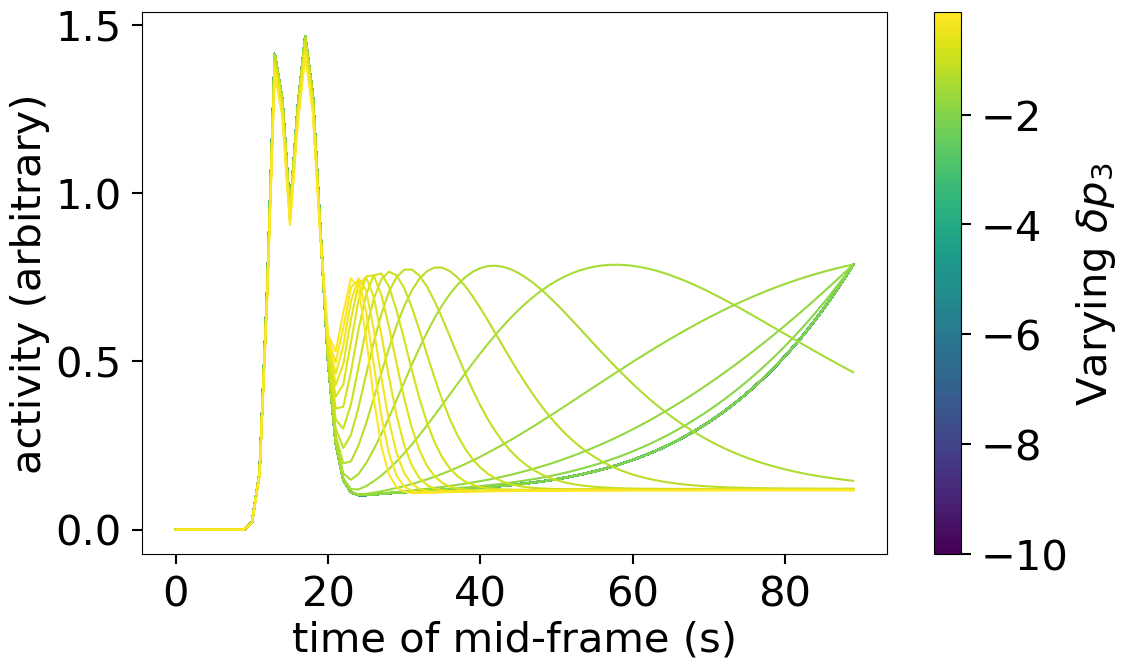

In [17]:
bc.plot_variations(tindex=7, tmin=-10, tmax=0)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

In [ ]:
# de novo
res = bc.run_nested()

# restart
# sampler = dynesty.DynamicNestedSampler.restore(bc.fqfp+"_dynesty-Boxcar-20240122210738.save")
# sampler.run_nested(resume=True)
# res = sampler.results

Misc. testing

In [ ]:
timesMid = np.arange(0.5, 10.5)
print(timesMid)

In [ ]:
taus = np.ones(timesMid.shape)
print(taus)

In [ ]:
times = timesMid - taus / 2
print(times)

In [ ]:
rho = np.arange(9, -1, -1)
print(rho)

In [ ]:
fqfp, _ = os.path.splitext(input_func_measurement)
fqfp, _ = os.path.splitext(fqfp)
bc = Boxcar(input_func_measurement, nlive=15) 
ifm = bc.input_func_measurement
nii = ifm["nii"]

In [ ]:
bc.save_csv({"timesMid": timesMid, "img": rho}, fqfn="test.csv")

In [ ]:
bc.save_nii({"timesMid": timesMid, "taus": taus, "img": rho, "nii": nii, "fqfp": fqfp}, fqfn="test.nii.gz")